<a href="https://colab.research.google.com/github/Jay5852/100-days-machine-learning-daily-practice/blob/main/dimensionality_reduction/principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1','feature2','feature3'])
df1['target'] = 0

# ✅ Use pd.concat instead of df.concat
df = pd.concat([df, df1], ignore_index=True)

# Randomly sample 40 rows
df = df.sample(40, random_state=23)


In [4]:
df.head()

,feature1,feature2,feature3,target
18,-0.331617,-1.632386,0.619114,1
23,1.010229,1.437830,2.327788,0
8,0.241106,-0.952510,-0.136267,1
22,1.676860,4.187503,-0.080565,0
33,2.823378,-0.332863,2.637391,0


In [6]:
import plotly.express as px
fig = px.scatter_3d(
    df,
    x=df['feature1'],
    y=df['feature2'],
    z=df['feature3'],
    color=df['target'].astype('str')
)
fig.update_traces(
    marker=dict(
        size=12,
        line=dict(width=2, color='DarkSlateGrey')
    ),
    selector=dict(mode='markers')
)
fig.show()


# Principle Component Analysis

In [7]:
# Step1 - Mean Centre the Data (Apply Standard Scalling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])
df.head()

,feature1,feature2,feature3,target
18,-0.669383,-1.998011,-0.042684,1
23,0.504227,0.932620,1.459332,0
8,-0.168466,-1.349045,-0.706704,1
22,1.087278,3.557281,-0.657739,0
33,2.090049,-0.757570,1.731490,0


In [8]:
# Step 2 - Finding the Covariance Matrix
Covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print("Covariance_matrix: \n",Covariance_matrix)
#

Covariance_matrix: 
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [9]:
# Step 3 -Finding the Eigen Vectors and Eigen Values
eigen_values,eigen_vectors = np.linalg.eig(Covariance_matrix)

In [10]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [11]:
eigen_vectors


array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

Populating the interactive namespace from numpy and matplotlib


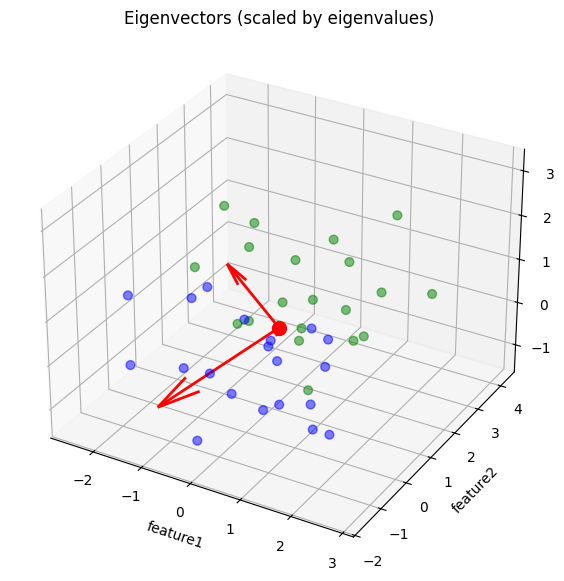

In [19]:
%pylab inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -----------------------------
# Generate synthetic dataset
# -----------------------------
np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1','feature2','feature3'])
df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

# -----------------------------
# Compute eigenvectors (PCA style)
# -----------------------------
X = df[['feature1','feature2','feature3']].values
X_centered = X - X.mean(axis=0)
cov_matrix = np.cov(X_centered.T)

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# -----------------------------
# Plotting
# -----------------------------
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of points colored by target
colors = df['target'].map({0:'green', 1:'blue'})
ax.scatter(df['feature1'], df['feature2'], df['feature3'],
           c=colors, s=40, alpha=0.5)

# Mean point
mean_point = X.mean(axis=0)
ax.scatter(mean_point[0], mean_point[1], mean_point[2],
           c='red', s=100, marker='o')

# Eigenvectors as arrows (scaled by eigenvalues)
for i in range(len(eigen_vectors)):
    v = eigen_vectors[:, i] * eigen_values[i]  # scale by eigenvalue
    ax.quiver(mean_point[0], mean_point[1], mean_point[2],
              v[0], v[1], v[2],
              length=np.linalg.norm(v),
              color="r", linewidth=2)

# Labels
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('feature3')
plt.title('Eigenvectors (scaled by eigenvalues)')

plt.show()


In [22]:
# Extracting top 2 eigen vectors
pc = eigen_vectors[0:2]
pc

array([[-0.61002583, -0.69239396,  0.3853039 ],
       [-0.53982115,  0.00718615, -0.84174906]])

In [25]:
# trnsforming the features like 3d into 2d
transformed_df = np.dot(df.iloc[:,0:3],pc.T)


In [26]:
new_df = pd.DataFrame(transformed_df, columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,-0.724373,0.294692,1
1,-1.469510,0.377697,1
2,0.502355,1.303153,1
3,-0.582337,-1.523289,1
4,-0.640420,0.704788,1


In [27]:

new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()